# Pyber Ride Sharing

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns

In [26]:
data = os.path.join ('raw_data', 'ride_data.csv')
data2= os.path.join('raw_data', 'city_data.csv')
ride_df = pd.read_csv(data)
city_df = pd.read_csv(data2)


In [27]:
combined_df =pd.DataFrame(pd.merge(city_df, ride_df, on='city'))

# Analysis
- Observed Trend 1
- Observed Trend 2
- Observed Trend 3


Observed Trend 1: Even though there are 2407 recorded rides. These rides only come from 125 cities.

In [28]:
combined_df.city.nunique()

125

In [29]:
combined_df.city.count()

2407

Observed Trend 2: Rural areas have the smallest proportion of rides recorded however, they tend to be more expensive than suburban or urban rides.

Observed Trend 3: Overall, it appears that even though  urban areas have the largest proportion of data recorded, they do not have the highest fares. 

# Bubble Plot of Ride Sharing Data

In [30]:
rural_df = (combined_df.loc[combined_df['type'] == 'Rural'])
urban_df = (combined_df.loc[combined_df['type'] == 'Urban'])
suburban_df = (combined_df.loc[combined_df['type'] == 'Suburban'])

grouped_rural =rural_df.groupby('city')
rural_fare=grouped_rural['fare'].mean()
rural_drivers = grouped_rural['driver_count'].mean().round(2)
rural_rides = grouped_rural.city.count()

grouped_urban =urban_df.groupby('city')
urban_fare=grouped_urban['fare'].mean()
urban_drivers = grouped_urban['driver_count'].mean().round(2)
urban_rides = grouped_urban.city.count()

grouped_suburban =suburban_df.groupby('city')
suburban_fare=grouped_suburban['fare'].mean()
suburban_drivers = grouped_suburban['driver_count'].mean().round(2)
suburban_rides = grouped_suburban.city.count()


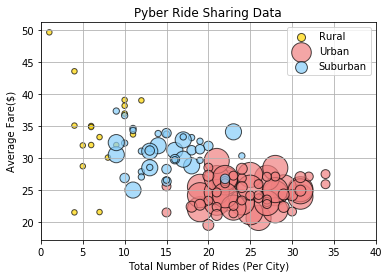

In [31]:
plt.grid()
plt.scatter(rural_rides, rural_fare, marker="o", color="gold",
            s=rural_df['driver_count']*10,edgecolors="black", alpha =.7)
plt.scatter(urban_rides, urban_fare, marker="o", color="lightcoral",
            s=urban_df['driver_count']*10,edgecolors="black", alpha =.7)
plt.scatter(suburban_rides, suburban_fare, marker="o", color="lightskyblue",
            s=suburban_df['driver_count']*10,edgecolors="black", alpha =.7)


plt.title('Pyber Ride Sharing Data')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare($)')
plt.xlim((0, 40))
plt.legend( ('Rural', 'Urban', 'Suburban'),
           loc='upper right')
plt.show()

# Total Fares by City Type

In [32]:
labels = ['Rural', 'Urban', 'Suburban']
colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0,0.1,0)

In [33]:
rural_fare_total = rural_df.fare.sum()
urban_fare_total = urban_df.fare.sum()
suburban_fare_total = suburban_df.fare.sum()
total_fare = [rural_fare_total ,urban_fare_total ,suburban_fare_total]


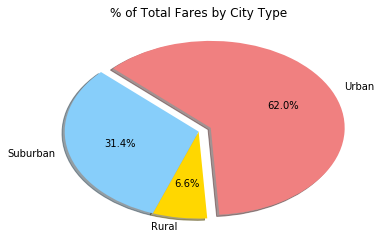

In [34]:
plt.title("% of Total Fares by City Type")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=250)
plt.show()

# Total Rides by City Type

In [35]:
rural_rides_total = rural_rides.sum()
urban_rides_total = urban_rides.sum()
suburban_rides_total = suburban_rides.sum()
total_rides = [rural_rides_total , urban_rides_total ,suburban_rides_total]


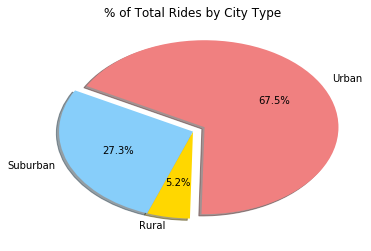

In [36]:
plt.title("% of Total Rides by City Type")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=250)
plt.show()

# Total Drivers by City Type

In [37]:
rural_driver_total = rural_drivers.sum()
urban_driver_total = urban_drivers.sum()
suburban_driver_total = suburban_drivers.sum()
total_driver = [rural_driver_total , urban_driver_total ,suburban_driver_total]

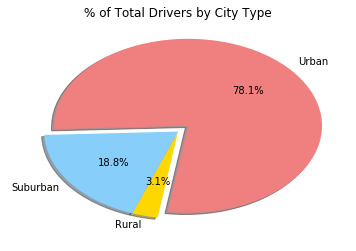

In [38]:
plt.title("% of Total Drivers by City Type")
plt.pie(total_driver, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=250)
plt.show()